In [35]:
# Install and load R pakcages that are necessary for the analysis - Packages are collections of R functions, data, 
# and compiled code in a well-defined format. Remove the hash sign to download and install the packages.

#source('http://bioconductor.org/biocLite.R')
#biocLite('phyloseq')
library("phyloseq")
packageVersion("phyloseq")

#biocLite("biomformat")
library("biomformat")
packageVersion("biomformat")

#install.packages("ggplot2")
library("ggplot2")
packageVersion("ggplot2")

#install.packages("vegan")
library("vegan")
packageVersion('vegan')

#install.packages("grid")
library("grid")
packageVersion('grid')

#install.packages("magrittr")
library(magrittr)
packageVersion('magrittr')

library(dplyr)
packageVersion('dplyr')

library(plyr)
packageVersion('plyr')

library(broom)
packageVersion('broom')

library('stringr')
packageVersion('stringr')

library('knitr')
packageVersion('knitr')

library('DESeq2')
packageVersion('DESeq2')

#install.packages("ggfortify")
library('ggfortify')
packageVersion('ggfortify')

[1] ‘1.22.3’

[1] ‘1.6.0’

[1] ‘3.2.1’

[1] ‘2.5.4’

[1] ‘3.4.4’

[1] ‘1.5’

[1] ‘0.8.0.1’

[1] ‘1.8.4’

[1] ‘0.5.2’

[1] ‘1.4.0’

[1] ‘1.22’

[1] ‘1.18.1’

[1] ‘0.4.7’

In [36]:
#Make sure the data has the sample names on rows if not just transform the data with t()
abund_table<-read.csv("Bile_Acids_Cutoff.csv",row.names=1,check.names=FALSE)
meta_table<-read.csv("Mapping_file_w_og.csv",row.names=1,check.names=FALSE)
#Transpose the data to have sample names on rows
abund_table<-t(abund_table)

meta_table<-data.frame(meta_table)
#Filter out samples not present in meta_table
abund_table<-abund_table[rownames(abund_table) %in% rownames(meta_table),]

#Now load the taxonomy
OTU_taxonomy<-read.csv("taxonomy_cutoff.csv",row.names=1,check.names=FALSE)

In [37]:
#Convert to phyloseq
library(phyloseq)
#Convert the data to phyloseq format
OTU = otu_table(as.matrix(abund_table), taxa_are_rows = FALSE)
TAX = tax_table(as.matrix(OTU_taxonomy))
SAM = sample_data(meta_table)
physeq<-merge_phyloseq(phyloseq(OTU, TAX),SAM)

In [38]:
# Removed Blank
physeq = subset_samples(physeq, ID_OG_MAP != 'Blank_injection_GE1_01_33205.mzXML')
sample_data(physeq)$ID_OG_MAP

[1] 582.T1       586.T5       571.T2       578.cacum.T5 576.T5      
  [6] 581.T4       584.T5       585.T0       601.T1       600.T4      
 [11] 578.T5       596.T2       585.T1       578.T1       601.T5      
 [16] 572.T1       602.T1       577.T4       592.T4       572.T3      
 [21] 578.T2       577.T0       597.T3       596.T1       589.T3      
 [26] 588.T2       599.T2       602.T2       594.T1       597.T2      
 [31] 584.T3       575.T1       570.T4       577.cacum.T5 590.T3      
 [36] 589.T2       573.T2       588.T5       575.T2       594.T5      
 [41] 574.T0       598.T3       581.cacum.T5 598.T0       584.T0      
 [46] 575.T0       601.T0       577.T3       598.T5       580.T5      
 [51] 571.T4       576.T2       581.T2       580.T4       573.T5      
 [56] 600.T2       599.T3       584.T2       599.T5       602.T5      
 [61] 601.T2       583.T2       598.T4       589.T0       595.T2      
 [66] 571.T1       593.T1       589.T1       599.T0       571.cacum.T5
 [71] 580.T0       572.T0       586.T4       592.T1       590.T2      
 [76] 583.cacum.T5 570.T2       574.T2       578.T0       586.T2      
 [81] 572.cacum.T5 588.T1       590.T1       593.T5       577.T2      
 [86] 581.T1       588.T4       574.T5       603.T2       595.T1      
 [91] 585.cacum.T5 582.T2       599.T1       588.T3       572.T4      
 [96] 582.T5       573.T1       593.T2       581.T3       584.cacum.T5
[101] 582.cacum.T5 592.T5       576.T0       602.T4       583.T1      
[106] 574.T4       592.T0       573.T4       578.T4       590.T4      
[111] 574.cacum.T5 591.T5       600.T5       595.T3       590.T5      
[116] 585.T3       570.T1       575.T4       580.T2       596.T0      
[121] 594.T3       600.T0       595.T5       589.T4       589.T5      
[126] 596.T4       582.T0       593.T4       575.T5       583.T5      
[131] 570.cacum.T5 570.T3       592.T3       572.T5       575.T3      
[136] 603.T1       595.T4       602.T0       591.T1       594.T0      
[141] 571.T3       581.T5       580.cacum.T5 580.T3       576.T1      
[146] 570.T5       574.T1       576.T3       588.T0       584.T1      
[151] 583.T3       602.T3       571.T0       593.T0       603.T5      
[156] 573.T0       573.cacum.T5 603.T3       599.T4       570.T0      
[161] 576.T4       597.T1       573.T3       594.T2       603.T4      
[166] 591.T4       582.T3       581.T0       586.T0       597.T0      
[171] 585.T4       586.T1       590.T0       596.T5       586.cacum.T5
[176] 583.T0       584.T4       601.T4       574.T3       585.T5      
[181] 600.T3       598.T1       571.T5       578.T3       596.T3      
[186] 586.T3       585.T2       576.cacum.T5 598.T2       597.T5      
[191] 601.T3       597.T4       583.T4       582.T4       577.T5      
[196] 591.T2       591.T3       595.T0       580.T1       600.T1      
[201] 603.T0       577.T1       591.T0       572.T2       593.T3      
[206] 594.T4       592.T2      
207 Levels: 570.cacum.T5 570.T0 570.T1 570.T2 570.T3 570.T4 ... 603.T5

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 348643 1999931 2589967 2893691 3597626 7441640 

[1] "Number of Samples in our Biom Table"


[1] 207

[1] "Number of Sequence variants we have."


[1] 165

[1] "Sequencing depth."


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 348643 1999931 2589967 2893691 3597626 7441640 

570.T0_RA1_01_33057 576.T5_BF11_01_33368  585.T0_RB3_01_33073 
              348643               804734               968754 
 574.T5_BF9_01_33366  596.T4_BE9_01_33353  576.T4_BD3_01_33208 
             1018661              1060190              1073986 
577.T5_BF12_01_33369  585.T3_BB3_01_33182 575.T5_BF10_01_33367 
             1222738              1241717              1249913 
 584.T0_RB2_01_33072  575.T0_RA6_01_33063  602.T3_BC7_01_33199 
             1265247              1326228              1409665 
 595.T1_RE8_01_33117  588.T5_BG9_01_33379 585.T1_RD11_01_33107 
             1436578              1457951              1465714 
 586.T5_BG8_01_33378  585.T2_RG7_01_33145  584.T3_BB2_01_33181 
             1501416              1529399              1533129 
584.T1_RD10_01_33106 585.CT5_BB5_01_33415  582.T2_RG4_01_33142 
             1550638              1559702              1565596 
584.T4_BD10_01_33215  583.T5_BG5_01_33375 598.T4_BE10_01_33354 
             1568046              1573145              1590126 
576.T2_RF11_01_33136 
             1601212

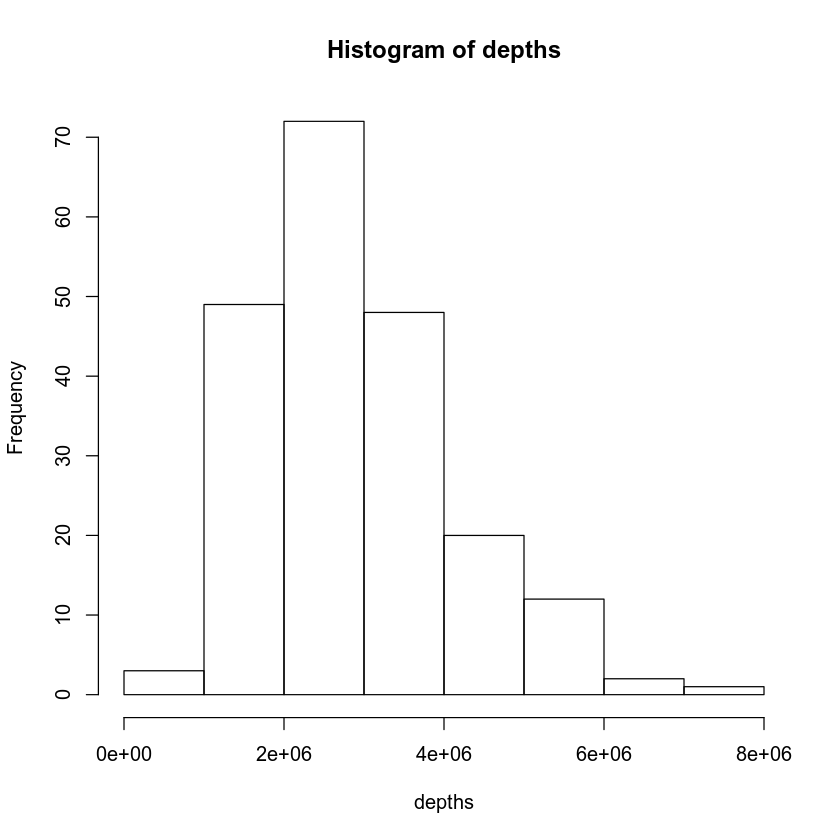

In [39]:
depths <- sample_sums(physeq)
summary(depths)
hist(depths)

# Start to explore the data a bit 
#number of samples
print ('Number of Samples in our Biom Table')
nsamples(physeq)
# number of sequence variants
print ('Number of Sequence variants we have.')
ntaxa(physeq)
#summary statistics of sampling depth
print ('Sequencing depth.')
depths <- sample_sums(physeq)
summary(depths)
hist(depths)
head(sort(sample_sums(physeq)),25)

# T2 let co-let

In [40]:
unique(sample_data(physeq)$Category)
unique(sample_data(physeq)$Week)

#Remove cecum and time 0
physeq.pt = subset_samples(physeq, Week != 'cecum.T5' & Week != '0' & Week != '1'& Week != '3'& Week != '4'& Week != '5')
unique(sample_data(physeq.pt)$Category)
unique(sample_data(physeq.pt)$Week)

# Remove Co-P and placebo
physeq.pt.pl = subset_samples(physeq.pt, Category != 'Placebo' & Category != 'Co-P')
unique(sample_data(physeq.pt.pl)$Category)
unique(sample_data(physeq.pt.pl)$Week)

[1] Letrozole Placebo   Co-L      Co-P     
Levels: Co-L Co-P Letrozole Placebo

[1] 1        5        2        cecum.T5 4        0        3       
Levels: 0 1 2 3 4 5 cecum.T5

[1] Placebo   Co-P      Letrozole Co-L     
Levels: Co-L Co-P Letrozole Placebo

[1] 2
Levels: 2

[1] Letrozole Co-L     
Levels: Co-L Letrozole

[1] 2
Levels: 2

In [41]:
diagdds = phyloseq_to_deseq2(physeq.pt.pl, ~ Category)
diagdds$Category = relevel(diagdds$Category, ref = "Letrozole")
# calculate geometric means prior to estimate size factors
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(diagdds), 1, gm_mean)
diagdds = estimateSizeFactors(diagdds, geoMeans = geoMeans)
diagdds = DESeq(diagdds, fitType="local")

converting counts to integer mode
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [T

In [42]:
res = results(diagdds)
res = res[order(res$padj, na.last=NA), ]
sigtab = res
lower = -15
upper = 15
sigtab= subset(res, log2FoldChange < lower | log2FoldChange > upper)
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(physeq.pt.pl)[rownames(sigtab), ], "matrix"))
sigtab = sigtab[order(sigtab$Domain),]
sigtab

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Domain,Phylum,Class,Order,Family,Genus,Species
6,1010.50264,28.03343,2.974177,9.425608,4.276221e-21,3.688241e-20,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,α-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester
25,1014.61070,28.04034,2.974177,9.427934,4.182458e-21,3.688241e-20,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,β-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid
36,829.21496,27.75652,2.974181,9.332491,1.034111e-20,7.135368e-20,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,B-Muricholic acid,.beta.-Muricholic acid
90,186.35985,-26.77891,2.974367,-9.003230,2.191731e-19,1.163303e-18,12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14)
67,466.88403,26.02017,2.974199,8.748632,2.159555e-18,9.933951e-18,3.beta.-Hydroxy-5-cholenoic acid,3.beta.-Hydroxy-5-cholenoic acid,3.beta.-Hydroxy-5-cholenoic acid,3.beta.-Hydroxy-5-cholenoic acid,3.beta.-Hydroxy-5-cholenoic acid,3β-Hydroxy-5-cholenoic acid,3.beta.-Hydroxy-5-cholenoic acid
99,41740.74969,-30.00000,2.974161,-10.086879,6.314536e-24,1.452349e-22,3.beta.-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14),3β-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14)
76,18723.34502,30.00000,2.974159,10.086884,6.314216e-24,1.452349e-22,Cholic acid,Cholic acid,Cholic acid,Cholic acid,Cholic acid,Cholic acid,Cholic acid
73,1182.61143,28.25275,2.974174,9.499359,2.111868e-21,2.428648e-20,Cholic acid,Cholic acid,Cholic acid,Cholic acid,Cholic acid,Cholic acid,Cholic acid
105,7282.40769,30.00000,2.974161,10.086879,6.314562e-24,1.452349e-22,Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14)
102,924.65280,27.91147,2.974179,9.384597,6.315732e-21,4.842061e-20,Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14)


In [43]:
library("ggplot2")
pdf('BA_All_Cutoff_T2_CoLvsL_DESEQ2.pdf', width=11, height=10)
theme_set(theme_bw())
sigtabgen = subset(sigtab, !is.na(Genus))
# Phylum order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Phylum, function(x) max(x))
sigtabgen$Phylum = factor(as.character(sigtabgen$Phylum), levels=names(x))
# Genus order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Genus, function(x) max(x))
sigtabgen$Genus = factor(as.character(sigtabgen$Genus), levels=names(x))
ggplot(sigtabgen, aes(y=Genus, x=log2FoldChange)) + 
  geom_vline(xintercept = 0.0, color = "gray", size = 0.5) +
  geom_point(size=4) + scale_x_continuous(minor_breaks=NULL) + coord_fixed(ratio=3) +
  theme(text= element_text(size=20),axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5),legend.position = 'none')
           
dev.off()

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'α-Hyodeoxycholic acid methyl ester ' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conver

“conversion failure on 'α-Hyodeoxycholic acid methyl ester ' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'β-Hyodeoxycholic acid' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'β-Hyodeoxycholic acid' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <ce>”Warning message

“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'α-Hyodeoxycholic acid methyl ester ' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'α-Hyodeoxycholic acid methyl ester ' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'β-Hyodeoxycholic acid' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'β-Hyodeoxycholic acid' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid' in 'mbcsToSbcs': dot substituted for <ce>”Warning

png 
  2

# T5 let co-let

In [44]:
unique(sample_data(physeq)$Category)
unique(sample_data(physeq)$Week)

#Remove cecum and time 0
physeq.pt = subset_samples(physeq, Week != 'cecum.T5' & Week != '0' & Week != '1'& Week != '3'& Week != '4'& Week != '2')
unique(sample_data(physeq.pt)$Category)
unique(sample_data(physeq.pt)$Week)

# Remove Co-P and placebo
physeq.pt.pl = subset_samples(physeq.pt, Category != 'Placebo' & Category != 'Co-P')
unique(sample_data(physeq.pt.pl)$Category)
unique(sample_data(physeq.pt.pl)$Week)

[1] Letrozole Placebo   Co-L      Co-P     
Levels: Co-L Co-P Letrozole Placebo

[1] 1        5        2        cecum.T5 4        0        3       
Levels: 0 1 2 3 4 5 cecum.T5

[1] Letrozole Placebo   Co-L      Co-P     
Levels: Co-L Co-P Letrozole Placebo

[1] 5
Levels: 5

[1] Letrozole Co-L     
Levels: Co-L Letrozole

[1] 5
Levels: 5

In [45]:
diagdds = phyloseq_to_deseq2(physeq.pt.pl, ~ Category)
diagdds$Category = relevel(diagdds$Category, ref = "Letrozole")
# calculate geometric means prior to estimate size factors
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(diagdds), 1, gm_mean)
diagdds = estimateSizeFactors(diagdds, geoMeans = geoMeans)
diagdds = DESeq(diagdds, fitType="local")

converting counts to integer mode
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [T

In [46]:
res = results(diagdds)
res = res[order(res$padj, na.last=NA), ]
sigtab = res
lower = -15
upper = 15
sigtab= subset(res, log2FoldChange < lower | log2FoldChange > upper)
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(physeq.pt.pl)[rownames(sigtab), ], "matrix"))
sigtab = sigtab[order(sigtab$Domain),]
sigtab

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Domain,Phylum,Class,Order,Family,Genus,Species
2,934.1624,-29.11887,2.974199,-9.790491,1.236933e-22,8.553894e-22,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,α-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester
9,43.2172,-24.91636,2.975000,-8.375249,5.510724e-17,1.622602e-16,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,β-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid
41,20193.9409,30.00000,2.974159,10.086884,6.314230e-24,5.580019e-23,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,B-Muricholic acid,.beta.-Muricholic acid
34,368.3075,-27.83436,2.974259,-9.358420,8.093765e-21,3.574746e-20,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,B-Muricholic acid,.beta.-Muricholic acid
58,9751.7904,30.00000,2.974161,10.086880,6.314480e-24,5.580019e-23,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,γ-Muricholic acid,.gamma.-Muricholic acid
90,2301.8356,29.10566,2.974168,9.786153,1.291154e-22,8.553894e-22,12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14)
88,325.1250,-27.65673,2.974272,-9.298657,1.422312e-20,5.798658e-20,12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14)
67,1144.0664,28.12914,2.974177,9.457789,3.145239e-21,1.515433e-20,3.beta.-Hydroxy-5-cholenoic acid,3.beta.-Hydroxy-5-cholenoic acid,3.beta.-Hydroxy-5-cholenoic acid,3.beta.-Hydroxy-5-cholenoic acid,3.beta.-Hydroxy-5-cholenoic acid,3β-Hydroxy-5-cholenoic acid,3.beta.-Hydroxy-5-cholenoic acid
96,159.8614,25.28811,2.974293,8.502226,1.859897e-17,5.798501e-17,3.beta.-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14),3β-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14)
72,1243.4154,28.24042,2.974176,9.495208,2.197718e-21,1.294212e-20,Cholic acid,Cholic acid,Cholic acid,Cholic acid,Cholic acid,Cholic acid,Cholic acid


In [47]:
library("ggplot2")
pdf('BA_All_Cutoff_T5_CoLvsL_DESEQ2.pdf', width=11, height=10)
theme_set(theme_bw())
sigtabgen = subset(sigtab, !is.na(Genus))
# Phylum order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Phylum, function(x) max(x))
sigtabgen$Phylum = factor(as.character(sigtabgen$Phylum), levels=names(x))
# Genus order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Genus, function(x) max(x))
sigtabgen$Genus = factor(as.character(sigtabgen$Genus), levels=names(x))
ggplot(sigtabgen, aes(y=Genus, x=log2FoldChange)) + 
  geom_vline(xintercept = 0.0, color = "gray", size = 0.5) +
  geom_point(size=4) + scale_x_continuous(minor_breaks=NULL) + coord_fixed(ratio=3) +
  theme(text= element_text(size=20),axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5),legend.position = 'none')
           
dev.off()

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'α-Hyodeoxycholic acid methyl ester ' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conver

“conversion failure on 'β-Hyodeoxycholic acid' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'β-Hyodeoxycholic acid' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γ-Muricholic acid' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γ-Muricholic acid' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphi

“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'α-Hyodeoxycholic acid methyl ester ' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'α-Hyodeoxycholic acid methyl ester ' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'β-Hyodeoxycholic acid' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'β-Hyodeoxycholic acid' in 'mbcsToSbcs': dot substituted for <b2

“conversion failure on 'γ-Muricholic acid' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γ-Muricholic acid' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in gri

png 
  2

# T2 p let

In [48]:
unique(sample_data(physeq)$Category)
unique(sample_data(physeq)$Week)

#Remove cecum and time 0
physeq.pt = subset_samples(physeq, Week != 'cecum.T5' & Week != '0' & Week != '1'& Week != '3'& Week != '4'& Week != '5')
unique(sample_data(physeq.pt)$Category)
unique(sample_data(physeq.pt)$Week)

# Remove Co-P and placebo
physeq.pt.pl = subset_samples(physeq.pt, Category != 'Co-L' & Category != 'Co-P')
unique(sample_data(physeq.pt.pl)$Category)
unique(sample_data(physeq.pt.pl)$Week)

[1] Letrozole Placebo   Co-L      Co-P     
Levels: Co-L Co-P Letrozole Placebo

[1] 1        5        2        cecum.T5 4        0        3       
Levels: 0 1 2 3 4 5 cecum.T5

[1] Placebo   Co-P      Letrozole Co-L     
Levels: Co-L Co-P Letrozole Placebo

[1] 2
Levels: 2

[1] Placebo   Letrozole
Levels: Letrozole Placebo

[1] 2
Levels: 2

In [49]:
diagdds = phyloseq_to_deseq2(physeq.pt.pl, ~ Category)
diagdds$Category = relevel(diagdds$Category, ref = "Letrozole")
# calculate geometric means prior to estimate size factors
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(diagdds), 1, gm_mean)
diagdds = estimateSizeFactors(diagdds, geoMeans = geoMeans)
diagdds = DESeq(diagdds, fitType="local")
res = results(diagdds)
res = res[order(res$padj, na.last=NA), ]
sigtab = res
lower = -15
upper = 15
sigtab= subset(res, log2FoldChange < lower | log2FoldChange > upper)
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(physeq.pt.pl)[rownames(sigtab), ], "matrix"))
sigtab = sigtab[order(sigtab$Domain),]
sigtab
library("ggplot2")
pdf('BA_All_Cutoff_T2_PvsL_DESEQ2.pdf', width=11, height=10)
theme_set(theme_bw())
sigtabgen = subset(sigtab, !is.na(Genus))
# Phylum order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Phylum, function(x) max(x))
sigtabgen$Phylum = factor(as.character(sigtabgen$Phylum), levels=names(x))
# Genus order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Genus, function(x) max(x))
sigtabgen$Genus = factor(as.character(sigtabgen$Genus), levels=names(x))
ggplot(sigtabgen, aes(y=Genus, x=log2FoldChange)) + 
  geom_vline(xintercept = 0.0, color = "gray", size = 0.5) +
  geom_point(size=4) + scale_x_continuous(minor_breaks=NULL) + coord_fixed(ratio=3) +
  theme(text= element_text(size=20),axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5),legend.position = 'none')
           
dev.off()

converting counts to integer mode
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 83 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Domain,Phylum,Class,Order,Family,Genus,Species
50,3637.76710,29.70958,2.974165,9.989218,1.699171e-23,2.293880e-22,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,γ-Muricholic acid,.gamma.-Muricholic acid
45,420.43016,26.69115,2.974214,8.974184,2.854599e-19,1.712759e-18,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,γ-Muricholic acid,.gamma.-Muricholic acid
90,526.68303,-28.03390,2.974223,-9.425621,4.275681e-21,3.848113e-20,12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14)
67,118.16999,24.24537,2.974357,8.151466,3.595399e-16,1.493473e-15,3.beta.-Hydroxy-5-cholenoic acid,3.beta.-Hydroxy-5-cholenoic acid,3.beta.-Hydroxy-5-cholenoic acid,3.beta.-Hydroxy-5-cholenoic acid,3.beta.-Hydroxy-5-cholenoic acid,3β-Hydroxy-5-cholenoic acid,3.beta.-Hydroxy-5-cholenoic acid
99,10524.03716,-30.00000,2.974163,-10.086871,6.315021e-24,1.136736e-22,3.beta.-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14),3β-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14)
68,8353.57960,-30.00000,2.974164,-10.086869,6.315199e-24,1.136736e-22,Chenodeoxycholic acid,Chenodeoxycholic acid,Chenodeoxycholic acid,Chenodeoxycholic acid,Chenodeoxycholic acid,Chenodeoxycholic acid,Chenodeoxycholic acid
76,10438.35831,30.00000,2.974161,10.086880,6.314487e-24,1.136736e-22,Cholic acid,Cholic acid,Cholic acid,Cholic acid,Cholic acid,Cholic acid,Cholic acid
108,161.91333,-27.07541,2.974364,-9.102924,8.793222e-20,5.935425e-19,Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14)
101,122.54057,24.96599,2.974350,8.393762,4.708280e-17,2.311338e-16,Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14)
110,225.82430,24.39021,2.974262,8.200425,2.395396e-16,1.077928e-15,Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14),Cholic acid (NIST14)


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γ-Muricholic acid' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γ

“conversion failure on 'γ-Muricholic acid' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γ-Muricholic acid' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in gri

“conversion failure on '3β-Hydroxy-5-cholenoic acid' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToS

png 
  2

# T5 p let

In [50]:
unique(sample_data(physeq)$Category)
unique(sample_data(physeq)$Week)

#Remove cecum and time 0
physeq.pt = subset_samples(physeq, Week != 'cecum.T5' & Week != '0' & Week != '1'& Week != '3'& Week != '4'& Week != '2')
unique(sample_data(physeq.pt)$Category)
unique(sample_data(physeq.pt)$Week)

# Remove Co-P and placebo
physeq.pt.pl = subset_samples(physeq.pt, Category != 'Co-L' & Category != 'Co-P')
unique(sample_data(physeq.pt.pl)$Category)
unique(sample_data(physeq.pt.pl)$Week)

[1] Letrozole Placebo   Co-L      Co-P     
Levels: Co-L Co-P Letrozole Placebo

[1] 1        5        2        cecum.T5 4        0        3       
Levels: 0 1 2 3 4 5 cecum.T5

[1] Letrozole Placebo   Co-L      Co-P     
Levels: Co-L Co-P Letrozole Placebo

[1] 5
Levels: 5

[1] Letrozole Placebo  
Levels: Letrozole Placebo

[1] 5
Levels: 5

In [51]:
diagdds = phyloseq_to_deseq2(physeq.pt.pl, ~ Category)
diagdds$Category = relevel(diagdds$Category, ref = "Letrozole")
# calculate geometric means prior to estimate size factors
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(diagdds), 1, gm_mean)
diagdds = estimateSizeFactors(diagdds, geoMeans = geoMeans)
diagdds = DESeq(diagdds, fitType="local")
res = results(diagdds)
res = res[order(res$padj, na.last=NA), ]
sigtab = res
lower = -15
upper = 15
sigtab= subset(res, log2FoldChange < lower | log2FoldChange > upper)
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(physeq.pt.pl)[rownames(sigtab), ], "matrix"))
sigtab = sigtab[order(sigtab$Domain),]
sigtab
write.csv(res,"test.csv", row.names = TRUE)
library("ggplot2")
pdf('BA_All_Cutoff_T5_PvsL_DESEQ2.pdf', width=11, height=10)
theme_set(theme_bw())
sigtabgen = subset(sigtab, !is.na(Genus))
# Phylum order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Phylum, function(x) max(x))
sigtabgen$Phylum = factor(as.character(sigtabgen$Phylum), levels=names(x))
# Genus order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Genus, function(x) max(x))
sigtabgen$Genus = factor(as.character(sigtabgen$Genus), levels=names(x))
ggplot(sigtabgen, aes(y=Genus, x=log2FoldChange)) + 
  geom_vline(xintercept = 0.0, color = "gray", size = 0.5) +
  geom_point(size=4) + scale_x_continuous(minor_breaks=NULL) + coord_fixed(ratio=3) +
  theme(text= element_text(size=20),axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5),legend.position = 'none')
           
dev.off()

converting counts to integer mode
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 62 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Domain,Phylum,Class,Order,Family,Genus,Species
2,847.84420,-28.75488,2.974186,-9.668151,4.117499e-22,3.788099e-21,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,α-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester
1,83.59619,-25.57533,2.974429,-8.598401,8.083463e-18,3.098661e-17,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,α-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester
9,23.55192,-23.86250,2.975114,-8.020702,1.051429e-15,3.224382e-15,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,β-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid
28,155.23767,25.72675,2.974391,8.649418,5.176257e-18,2.381078e-17,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,β-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid
34,83.96191,-25.59275,2.974428,-8.604258,7.681213e-18,3.098661e-17,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,B-Muricholic acid,.beta.-Muricholic acid
91,1055.29594,28.49421,2.974193,9.580484,9.659086e-22,7.405299e-21,12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14)
88,295.08289,-27.31382,2.974236,-9.183474,4.174050e-20,2.742947e-19,12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14),12-Ketodeoxycholic acid (NIST14)
93,5060.05592,-30.00000,2.974164,-10.086867,6.315305e-24,1.452720e-22,3.beta.-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14),3β-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14)
99,2670.46331,-30.00000,2.974168,-10.086853,6.316173e-24,1.452720e-22,3.beta.-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14),3β-Hydroxy-5-cholenoic acid (NIST14),3.beta.-Hydroxy-5-cholenoic acid (NIST14)
68,1639.36297,-29.65908,2.974174,-9.972209,2.016927e-23,2.386622e-22,Chenodeoxycholic acid,Chenodeoxycholic acid,Chenodeoxycholic acid,Chenodeoxycholic acid,Chenodeoxycholic acid,Chenodeoxycholic acid,Chenodeoxycholic acid


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'α-Hyodeoxycholic acid methyl ester ' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'α-Hyodeoxycholic acid methyl ester ' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'β-Hyodeoxycholic acid' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conv

“conversion failure on 'α-Hyodeoxycholic acid methyl ester ' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'β-Hyodeoxycholic acid' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'β-Hyodeoxycholic acid' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'α-Hyodeoxycholic acid methyl ester ' in 'mbcsToSbcs': dot substituted for <ce

“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β-Hydroxy-5-cholenoic acid (NIST14)' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'α-Hyodeoxycholic acid methyl ester ' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'α-Hyodeoxycholic acid methyl est

png 
  2

# T2 cohouse vs non

In [26]:
#Make sure the data has the sample names on rows if not just transform the data with t()
abund_table<-read.csv("Bile_Acids_Cutoff.csv",row.names=1,check.names=FALSE)
meta_table<-read.csv("cohouse_non_mapping.csv",row.names=1,check.names=FALSE)
#Transpose the data to have sample names on rows
abund_table<-t(abund_table)

meta_table<-data.frame(meta_table)
#Filter out samples not present in meta_table
abund_table<-abund_table[rownames(abund_table) %in% rownames(meta_table),]

#Now load the taxonomy
OTU_taxonomy<-read.csv("taxonomy_cutoff.csv",row.names=1,check.names=FALSE)
#Convert to phyloseq
library(phyloseq)
#Convert the data to phyloseq format
OTU = otu_table(as.matrix(abund_table), taxa_are_rows = FALSE)
TAX = tax_table(as.matrix(OTU_taxonomy))
SAM = sample_data(meta_table)
physeq<-merge_phyloseq(phyloseq(OTU, TAX),SAM)
# Removed Blank
physeq = subset_samples(physeq, ID_OG_MAP != 'Blank_injection_GE1_01_33205.mzXML')
sample_data(physeq)$ID_OG_MAP

[1] 582.T1       586.T5       571.T2       578.cacum.T5 576.T5      
  [6] 581.T4       584.T5       585.T0       601.T1       600.T4      
 [11] 578.T5       596.T2       585.T1       578.T1       601.T5      
 [16] 572.T1       602.T1       577.T4       592.T4       572.T3      
 [21] 578.T2       577.T0       597.T3       596.T1       589.T3      
 [26] 588.T2       599.T2       602.T2       594.T1       597.T2      
 [31] 584.T3       575.T1       570.T4       577.cacum.T5 590.T3      
 [36] 589.T2       573.T2       588.T5       575.T2       594.T5      
 [41] 574.T0       598.T3       581.cacum.T5 598.T0       584.T0      
 [46] 575.T0       601.T0       577.T3       598.T5       580.T5      
 [51] 571.T4       576.T2       581.T2       580.T4       573.T5      
 [56] 600.T2       599.T3       584.T2       599.T5       602.T5      
 [61] 601.T2       583.T2       598.T4       589.T0       595.T2      
 [66] 571.T1       593.T1       589.T1       599.T0       571.cacum.T5
 [71] 580.T0       572.T0       586.T4       592.T1       590.T2      
 [76] 583.cacum.T5 570.T2       574.T2       578.T0       586.T2      
 [81] 572.cacum.T5 588.T1       590.T1       593.T5       577.T2      
 [86] 581.T1       588.T4       574.T5       603.T2       595.T1      
 [91] 585.cacum.T5 582.T2       599.T1       588.T3       572.T4      
 [96] 582.T5       573.T1       593.T2       581.T3       584.cacum.T5
[101] 582.cacum.T5 592.T5       576.T0       602.T4       583.T1      
[106] 574.T4       592.T0       573.T4       578.T4       590.T4      
[111] 574.cacum.T5 591.T5       600.T5       595.T3       590.T5      
[116] 585.T3       570.T1       575.T4       580.T2       596.T0      
[121] 594.T3       600.T0       595.T5       589.T4       589.T5      
[126] 596.T4       582.T0       593.T4       575.T5       583.T5      
[131] 570.cacum.T5 570.T3       592.T3       572.T5       575.T3      
[136] 603.T1       595.T4       602.T0       591.T1       594.T0      
[141] 571.T3       581.T5       580.cacum.T5 580.T3       576.T1      
[146] 570.T5       574.T1       576.T3       588.T0       584.T1      
[151] 583.T3       602.T3       571.T0       593.T0       603.T5      
[156] 573.T0       573.cacum.T5 603.T3       599.T4       570.T0      
[161] 576.T4       597.T1       573.T3       594.T2       603.T4      
[166] 591.T4       582.T3       581.T0       586.T0       597.T0      
[171] 585.T4       586.T1       590.T0       596.T5       586.cacum.T5
[176] 583.T0       584.T4       601.T4       574.T3       585.T5      
[181] 600.T3       598.T1       571.T5       578.T3       596.T3      
[186] 586.T3       585.T2       576.cacum.T5 598.T2       597.T5      
[191] 601.T3       597.T4       583.T4       582.T4       577.T5      
[196] 591.T2       591.T3       595.T0       580.T1       600.T1      
[201] 603.T0       577.T1       591.T0       572.T2       593.T3      
[206] 594.T4       592.T2      
207 Levels: 570.cacum.T5 570.T0 570.T1 570.T2 570.T3 570.T4 ... 603.T5

In [27]:
unique(sample_data(physeq)$Category)
unique(sample_data(physeq)$Week)

#Remove cecum and time 0
physeq.pt = subset_samples(physeq, Week != 'cecum.T5' & Week != '0' & Week != '1'& Week != '3'& Week != '4'& Week != '5')
unique(sample_data(physeq.pt)$Category)
unique(sample_data(physeq.pt)$Week)

[1] non_Co-house Co-house    
Levels: Co-house non_Co-house

[1] 1        5        2        cecum.T5 4        0        3       
Levels: 0 1 2 3 4 5 cecum.T5

[1] non_Co-house Co-house    
Levels: Co-house non_Co-house

[1] 2
Levels: 2

In [29]:
diagdds = phyloseq_to_deseq2(physeq.pt, ~ Category)
# calculate geometric means prior to estimate size factors
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(diagdds), 1, gm_mean)
diagdds = estimateSizeFactors(diagdds, geoMeans = geoMeans)
diagdds = DESeq(diagdds, fitType="local")
res = results(diagdds)
res = res[order(res$padj, na.last=NA), ]
alpha = .05
sigtab = res[(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(physeq.pt)[rownames(sigtab), ], "matrix"))
sigtab = sigtab[order(sigtab$Domain),]
sigtab
library("ggplot2")
pdf('BA_All_Cutoff_T2_Placebo&Let_Cohouse_DESEQ2.pdf', width=11, height=10)
theme_set(theme_bw())
sigtabgen = subset(sigtab, !is.na(Genus))
# Phylum order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Phylum, function(x) max(x))
sigtabgen$Phylum = factor(as.character(sigtabgen$Phylum), levels=names(x))
# Genus order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Genus, function(x) max(x))
sigtabgen$Genus = factor(as.character(sigtabgen$Genus), levels=names(x))
ggplot(sigtabgen, aes(y=Genus, x=log2FoldChange, color=Phylum)) + 
  geom_vline(xintercept = 0.0, color = "gray", size = 0.5) +
  geom_point(size=6) + 
  theme(text= element_text(size=20),axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5),legend.position = 'none')
           
dev.off()

converting counts to integer mode
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [T

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Domain,Phylum,Class,Order,Family,Genus,Species
6,1122.29434,-29.986841,2.930106,-10.234046,1.395637e-24,1.129197e-23,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester
8,11599.40724,6.970216,2.419506,2.880842,3.966143e-03,9.289125e-03,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester
19,488.91877,-28.711450,2.930119,-9.798733,1.140071e-22,5.637019e-22,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid
40,3616.81679,-30.000000,2.930099,-10.238560,1.332035e-24,1.129197e-23,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid
32,579.83441,-28.972493,2.930115,-9.887834,4.700890e-23,2.614870e-22,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid
36,344.87152,-27.917549,2.930128,-9.527757,1.607174e-21,6.811355e-21,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid
58,483.16741,-28.827362,2.930119,-9.838291,7.700817e-23,4.031604e-22,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid
45,434.24154,27.956087,2.930136,9.540884,1.416195e-21,6.302068e-21,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid
69,3422.70080,30.000000,2.930101,10.238556,1.332099e-24,1.129197e-23,Cholic acid,Cholic acid,Cholic acid,Cholic acid,Cholic acid,Cholic acid,Cholic acid
73,850.14334,-29.598317,2.930109,-10.101438,5.443797e-24,3.726907e-23,Cholic acid,Cholic acid,Cholic acid,Cholic acid,Cholic acid,Cholic acid,Cholic acid


png 
  2

# T5 Placebo&Let vs Cohouse

In [30]:
unique(sample_data(physeq)$Category)
unique(sample_data(physeq)$Week)

#Remove cecum and time 0
physeq.pt = subset_samples(physeq, Week != 'cecum.T5' & Week != '0' & Week != '1'& Week != '3'& Week != '4'& Week != '2')
unique(sample_data(physeq.pt)$Category)
unique(sample_data(physeq.pt)$Week)

[1] non_Co-house Co-house    
Levels: Co-house non_Co-house

[1] 1        5        2        cecum.T5 4        0        3       
Levels: 0 1 2 3 4 5 cecum.T5

[1] non_Co-house Co-house    
Levels: Co-house non_Co-house

[1] 5
Levels: 5

In [31]:
diagdds = phyloseq_to_deseq2(physeq.pt, ~ Category)
# calculate geometric means prior to estimate size factors
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(diagdds), 1, gm_mean)
diagdds = estimateSizeFactors(diagdds, geoMeans = geoMeans)
diagdds = DESeq(diagdds, fitType="local")
res = results(diagdds)
res = res[order(res$padj, na.last=NA), ]
alpha = .05
sigtab = res[(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(physeq.pt)[rownames(sigtab), ], "matrix"))
sigtab = sigtab[order(sigtab$Domain),]
sigtab
library("ggplot2")
pdf('BA_All_Cutoff_T5_Placebo&Let_Cohouse_DESEQ2.pdf', width=11, height=10)
theme_set(theme_bw())
sigtabgen = subset(sigtab, !is.na(Genus))
# Phylum order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Phylum, function(x) max(x))
sigtabgen$Phylum = factor(as.character(sigtabgen$Phylum), levels=names(x))
# Genus order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Genus, function(x) max(x))
sigtabgen$Genus = factor(as.character(sigtabgen$Genus), levels=names(x))
ggplot(sigtabgen, aes(y=Genus, x=log2FoldChange, color=Phylum)) + 
  geom_vline(xintercept = 0.0, color = "gray", size = 0.5) +
  geom_point(size=6) + 
  theme(text= element_text(size=20),axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5),legend.position = 'none')
           
dev.off()

converting counts to integer mode
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [T

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Domain,Phylum,Class,Order,Family,Genus,Species
9,12.09034,23.878549,2.932095,8.143853,3.828933e-16,1.068911e-15,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid
23,5867.64966,-30.000000,2.930098,-10.238565,1.331973e-24,1.785310e-23,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid
28,112.05621,26.987756,2.930312,9.209857,3.265595e-20,1.367468e-19,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid
26,170.90990,-26.938669,2.930155,-9.193598,3.799150e-20,1.497312e-19,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid
41,17869.66050,-30.000000,2.767247,-10.841100,2.198129e-27,1.472747e-25,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid
58,565.62936,-28.553414,2.930114,-9.744813,1.941363e-22,1.182467e-21,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid
47,45.14073,25.717227,2.930633,8.775316,1.704252e-18,5.437376e-18,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid
57,61.38832,-25.619258,2.930260,-8.742999,2.270022e-18,6.612672e-18,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid,.gamma.-Muricholic acid
67,746.29023,-28.523545,2.647329,-10.774461,4.544365e-27,1.522362e-25,3.beta.-Hydroxy-5-cholenoic acid,3.beta.-Hydroxy-5-cholenoic acid,3.beta.-Hydroxy-5-cholenoic acid,3.beta.-Hydroxy-5-cholenoic acid,3.beta.-Hydroxy-5-cholenoic acid,3.beta.-Hydroxy-5-cholenoic acid,3.beta.-Hydroxy-5-cholenoic acid
72,577.05331,-28.691974,2.930114,-9.792102,1.217379e-22,8.156437e-22,Cholic acid,Cholic acid,Cholic acid,Cholic acid,Cholic acid,Cholic acid,Cholic acid


png 
  2

# Test

In [15]:
diagdds = phyloseq_to_deseq2(physeq.pt.pl, ~ Category)
diagdds$Category = relevel(diagdds$Category, ref = "Letrozole")
# calculate geometric means prior to estimate size factors
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(diagdds), 1, gm_mean)
diagdds = estimateSizeFactors(diagdds, geoMeans = geoMeans)
diagdds = DESeq(diagdds, fitType="local")
res = results(diagdds)
res = res[order(res$padj, na.last=NA), ]
lower = -24
upper = 22.792
sigtab= subset(res, log2FoldChange < lower | log2FoldChange > upper)
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(physeq.pt.pl)[rownames(sigtab), ], "matrix"))
sigtab = sigtab[order(sigtab$Domain),]
sigtab
write.csv(res,"test.csv", row.names = TRUE)
library("ggplot2")
pdf('test.pdf', width=11, height=10)
theme_set(theme_bw())
sigtabgen = subset(sigtab, !is.na(Genus))
# Phylum order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Phylum, function(x) max(x))
sigtabgen$Phylum = factor(as.character(sigtabgen$Phylum), levels=names(x))
# Genus order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Genus, function(x) max(x))
sigtabgen$Genus = factor(as.character(sigtabgen$Genus), levels=names(x))
ggplot(sigtabgen, aes(y=Genus, x=log2FoldChange)) + 
  geom_vline(xintercept = 0.0, color = "gray", size = 0.5) +
  geom_point(size=6) + 
  theme(text= element_text(size=20),axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5),legend.position = 'none')
           
dev.off()

converting counts to integer mode
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 62 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Domain,Phylum,Class,Order,Family,Genus,Species
2,847.84420,-28.75488,2.974186,-9.668151,4.117499e-22,3.788099e-21,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester
1,83.59619,-25.57533,2.974429,-8.598401,8.083463e-18,3.098661e-17,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester
28,155.23767,25.72675,2.974391,8.649418,5.176257e-18,2.381078e-17,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid,.beta.-Hyodeoxycholic acid
34,83.96191,-25.59275,2.974428,-8.604258,7.681213e-18,3.098661e-17,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid,.beta.-Muricholic acid
68,1639.36297,-29.65908,2.974174,-9.972209,2.016927e-23,2.386622e-22,Chenodeoxycholic acid,Chenodeoxycholic acid,Chenodeoxycholic acid,Chenodeoxycholic acid,Chenodeoxycholic acid,Chenodeoxycholic acid,Chenodeoxycholic acid
70,68.99575,24.30151,2.974682,8.169447,3.098062e-16,1.096237e-15,Cholic acid,Cholic acid,Cholic acid,Cholic acid,Cholic acid,Cholic acid,Cholic acid
91,1055.29594,28.49421,2.974193,9.580484,9.659086e-22,7.405299e-21,Spectral Match to 12-Ketodeoxycholic acid from NIST14,Spectral Match to 12-Ketodeoxycholic acid from NIST14,Spectral Match to 12-Ketodeoxycholic acid from NIST14,Spectral Match to 12-Ketodeoxycholic acid from NIST14,Spectral Match to 12-Ketodeoxycholic acid from NIST14,Spectral Match to 12-Ketodeoxycholic acid from NIST14,Spectral Match to 12-Ketodeoxycholic acid from NIST14
88,295.08289,-27.31382,2.974236,-9.183474,4.174050e-20,2.742947e-19,Spectral Match to 12-Ketodeoxycholic acid from NIST14,Spectral Match to 12-Ketodeoxycholic acid from NIST14,Spectral Match to 12-Ketodeoxycholic acid from NIST14,Spectral Match to 12-Ketodeoxycholic acid from NIST14,Spectral Match to 12-Ketodeoxycholic acid from NIST14,Spectral Match to 12-Ketodeoxycholic acid from NIST14,Spectral Match to 12-Ketodeoxycholic acid from NIST14
93,5060.05592,-30.00000,2.974164,-10.086867,6.315305e-24,1.452720e-22,Spectral Match to 3.beta.-Hydroxy-5-cholenoic acid from NIST14,Spectral Match to 3.beta.-Hydroxy-5-cholenoic acid from NIST14,Spectral Match to 3.beta.-Hydroxy-5-cholenoic acid from NIST14,Spectral Match to 3.beta.-Hydroxy-5-cholenoic acid from NIST14,Spectral Match to 3.beta.-Hydroxy-5-cholenoic acid from NIST14,Spectral Match to 3.beta.-Hydroxy-5-cholenoic acid from NIST14,Spectral Match to 3.beta.-Hydroxy-5-cholenoic acid from NIST14
99,2670.46331,-30.00000,2.974168,-10.086853,6.316173e-24,1.452720e-22,Spectral Match to 3.beta.-Hydroxy-5-cholenoic acid from NIST14,Spectral Match to 3.beta.-Hydroxy-5-cholenoic acid from NIST14,Spectral Match to 3.beta.-Hydroxy-5-cholenoic acid from NIST14,Spectral Match to 3.beta.-Hydroxy-5-cholenoic acid from NIST14,Spectral Match to 3.beta.-Hydroxy-5-cholenoic acid from NIST14,Spectral Match to 3.beta.-Hydroxy-5-cholenoic acid from NIST14,Spectral Match to 3.beta.-Hydroxy-5-cholenoic acid from NIST14


png 
  2